# Coursera & IBM Machine Learning - TIME SERIES Final Project
One of the main objectives of this course is to help you gain hands-on experience in communicating insightful and impactful findings to stakeholders. In this project you will leverage the tools and techniques you learned throughout this course, including Time Series Analysis, Survival Analysis, or Deep Learning in an analytical task of your choosing. You can use any of these analysis in any data set that includes a time component. You are free to choose the technique that best help analyze a data set that you feel passionate about. Just as important as the analytical work, you will also prepare a report that communicates insights you found from your model development exercise.

As a main deliverable, you will submit a report that helps you focus on highlighting your analytical skills, thought process, and next steps.

## Review Criteria
Your peer or instructor will review your report from the perspective of a Chief Data Officer or the Head of Analytics of your team and will assess whether the model you selected best helped you achieve the main objective of your analysis.

Yes, you are expected to leverage a wide variety of tools, but this report should focus on presenting findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not a code review. Optionally, you can submit your code as a python notebook or as a print out in the appendix of your document.

The grading will center around 5 main points:

* Does the report include a section describing the data?
* Does the report include a paragraph detailing the main objective(s) of this analysis?  
* Does the report include a section with variations of a Time Series, Survival Analysis, or Deep Learning model and specifies which one is the model that best suits the main objective(s) of this analysis?
* Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
* Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different modeling techniques?

## Reqirements
Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

Sections required in your report:

* Main objective of the analysis that also specifies whether your model will be focused on a specific type of Time Series, Survival Anlaysis, or Deep Learning and the benefits that your analysis brings to the business or stakeholders of this data.
* Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.
* Brief summary of data exploration and actions taken for data cleaning or feature engineering.
* Summary of training at least three variations of the Time Series, Survival Analysis, or Deep Learning model you selected. For example, you can use different models or different hyperparameters.
* A paragraph explaining which of your models you recommend as a final model that best fits your needs in terms of accuracy or explainability.
* Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.
* Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

# 1. Importing & Cleaning the Dataset

In [1]:
# for EDA & preprocessing
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('default')
plt.rcParams.update({'axes.grid' : True, 'axes.grid.which' : 'major', 'grid.alpha' : 0.5})
from sklearn.preprocessing import MinMaxScaler

# error metrics
from sklearn.metrics import r2_score as R2, mean_squared_error as MSE, mean_absolute_percentage_error as MAPE

# for time series decomposition
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from prophet import Prophet

# for deep learning
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout

Importing plotly failed. Interactive plots will not work.


In [2]:
# load dataset with hourly information
df = pd.read_csv("hour.csv", infer_datetime_format=True)
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Create a Datetime Index

In [5]:
# combine date & hours for datetime format conversion
df['date'] = df['dteday'] +'-'+ df['hr'].astype('str') +":00"
df['date'] = df['date'].astype('datetime64[h]')
#df['date'] = pd.to_datetime(df['date'], freq="h")
df.set_index(df.date, inplace=True)
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='date', length=17379, freq=None)

In [6]:
# remove redundant columns
df.drop(columns=['instant', 'dteday', 'date'], inplace=True)
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
date,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31 20:00:00,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31 21:00:00,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [7]:
# 2012 is a leap year = 366 days
# (365d + 366d) * 24h = 17544 index values

new_index = pd.date_range('2011-01-01 00:00:00', '2012-12-31 23:00:00', freq='h')
new_index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=17544, freq='H')

In [8]:
df = df.reindex(new_index)
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2011-01-01 00:00:00,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
2011-01-01 01:00:00,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2011-01-01 02:00:00,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
2011-01-01 03:00:00,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
2011-01-01 04:00:00,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
2012-12-31 20:00:00,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0
2012-12-31 21:00:00,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
2012-12-31 22:00:00,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [9]:
df.isna().sum()

season        165
yr            165
mnth          165
hr            165
holiday       165
weekday       165
workingday    165
weathersit    165
temp          165
atemp         165
hum           165
windspeed     165
casual        165
registered    165
cnt           165
dtype: int64

### Find & Fill Missing from the new Datetime Index  

In [10]:
# fill in gaps for weekday
df['weekday'] = df.index.weekday
# fill in gaps for working day
df['workingday'] = [1 if x < 5 else 0 for x in df['weekday']]
# fill in gaps for holiday
df['holiday'].fillna(method='ffill', inplace=True, downcast='infer')
# fill in gaps for weathersit
df['weathersit'].fillna(method='ffill', inplace=True, downcast='infer')
# fill in gaps for year
df['yr'] = df.index.year
# fill in gaps for seasons
df['season'] = df.index.month%12 // 3 + 1
# fill in gaps for month
df['mnth'] = df.index.month
# fill gaps for hours
df['hr'] = df.index.hour

df.isna().sum()

season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp          165
atemp         165
hum           165
windspeed     165
casual        165
registered    165
cnt           165
dtype: int64

In [11]:
# fill in rest
for col in ['temp', 'atemp', 'hum', 'windspeed']:
    df[col] = df[col].interpolate()
for col in ['casual', 'registered', 'cnt']:
    df[col] = df[col].interpolate(method='time').astype('int64')

In [12]:
df.isna().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,2.502052,2011.500684,6.519836,11.500000,0.029754,3.002736,0.712722,1.434223,0.495044,0.473957,0.628428,0.190965,35.355506,152.524624,187.882752
std,1.115001,0.500014,3.449649,6.922384,0.169912,2.003472,0.452505,0.648339,0.193192,0.172519,0.193041,0.122900,49.183638,151.221298,181.281523
min,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2011.000000,4.000000,5.750000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,33.000000,38.000000
50%,3.000000,2012.000000,7.000000,11.500000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,16.000000,114.000000,140.000000
75%,3.000000,2012.000000,10.000000,17.250000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.253700,48.000000,219.000000,279.000000
max,4.000000,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# 2. Exploratory Data Analysis

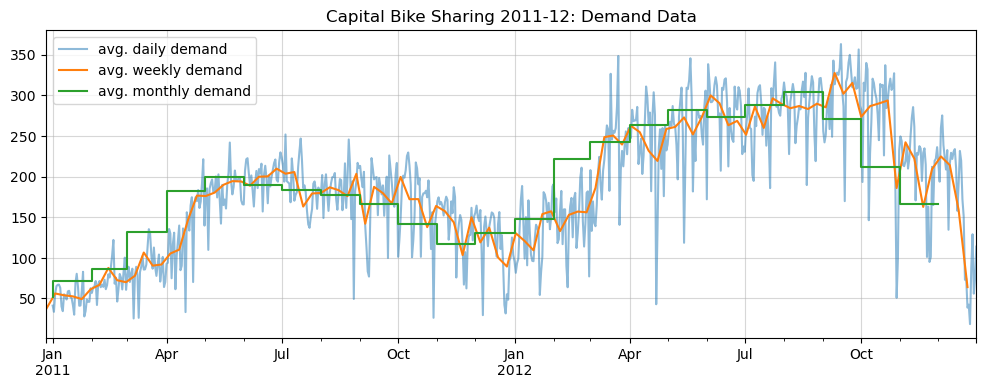

In [14]:
demand_hourly = df[['cnt']]
# upsampling
demand_daily = demand_hourly.resample('D').mean()
demand_weekly = demand_hourly.resample('W').mean()
demand_weekly = demand_weekly[:-1]
demand_monthly = demand_hourly.resample('M').mean()

#visualizing
fig = plt.figure(figsize = (12,4))
demand_daily['cnt'].plot(label="avg. daily demand", alpha=0.5)
demand_weekly['cnt'].plot(label="avg. weekly demand")
demand_monthly['cnt'].plot(drawstyle="steps", label="avg. monthly demand")

plt.legend()
plt.title("Capital Bike Sharing 2011-12: Demand Data");

In [15]:
df_11 = df[df['yr'] == 2011]
df_12 = df[df['yr'] == 2012]

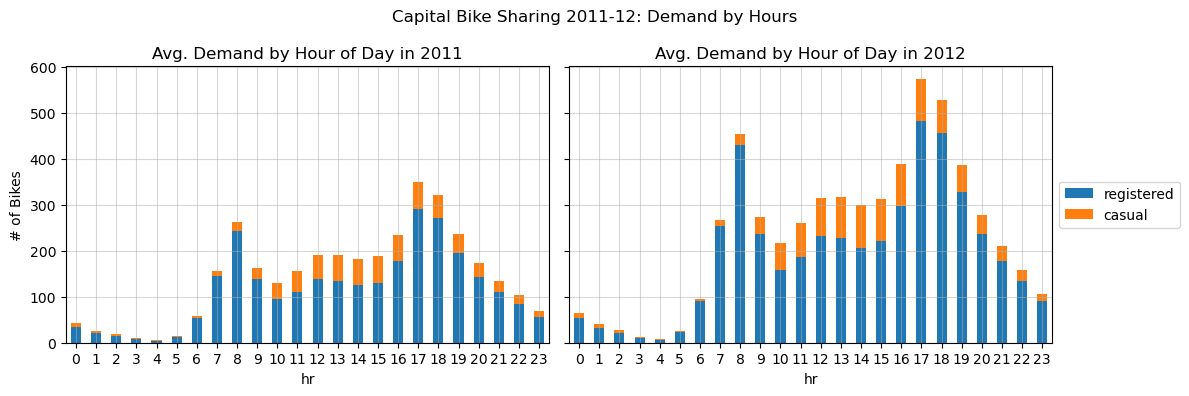

In [16]:
# average demand by hour
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=True)
fig.suptitle("Capital Bike Sharing 2011-12: Demand by Hours")
df_11[['registered', 'casual', 'hr']].groupby(['hr']).mean().plot.bar(stacked=True, ax=axs[0], rot=0)
axs[0].set_title("Avg. Demand by Hour of Day in 2011")
axs[0].legend().remove()
axs[0].set_ylabel("# of Bikes")
df_12[['registered', 'casual', 'hr']].groupby(['hr']).mean().plot.bar(stacked=True, ax=axs[1], rot=0)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_title("Avg. Demand by Hour of Day in 2012")
plt.tight_layout();

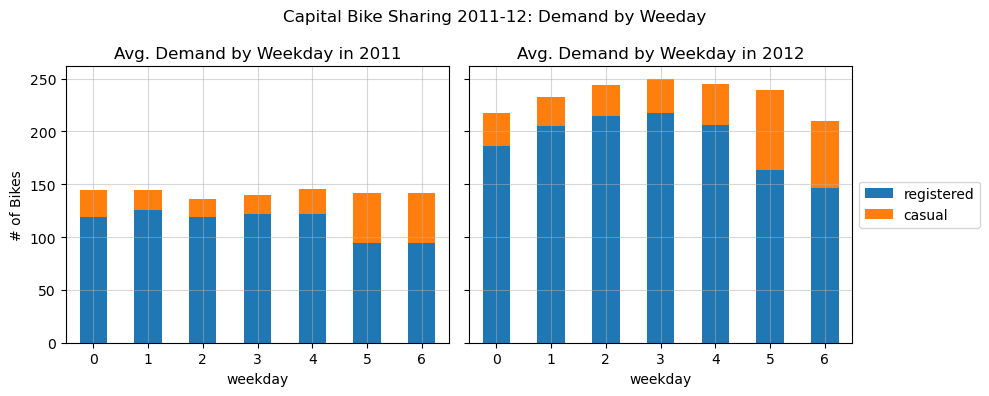

In [17]:
# average demand by weekday
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True, sharex=True)
fig.suptitle("Capital Bike Sharing 2011-12: Demand by Weeday")
df_11[['registered', 'casual', 'weekday']].groupby(['weekday']).mean().plot.bar(stacked=True, ax=axs[0], rot=0)
axs[0].set_title("Avg. Demand by Weekday in 2011")
axs[0].legend().remove()
axs[0].set_ylabel("# of Bikes")
df_12[['registered', 'casual', 'weekday']].groupby(['weekday']).mean().plot.bar(stacked=True, ax=axs[1], rot=0)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_title("Avg. Demand by Weekday in 2012")
plt.tight_layout();

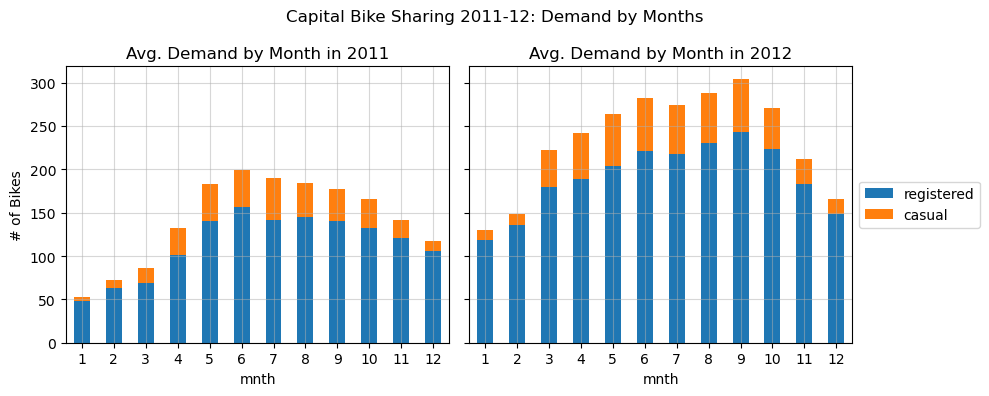

In [18]:
# average demand by month
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True, sharex=True)
fig.suptitle("Capital Bike Sharing 2011-12: Demand by Months")
df_11[['registered', 'casual', 'mnth']].groupby(['mnth']).mean().plot.bar(stacked=True, ax=axs[0], rot=0)
axs[0].set_title("Avg. Demand by Month in 2011")
axs[0].legend().remove()
axs[0].set_ylabel("# of Bikes")
df_12[['registered', 'casual', 'mnth']].groupby(['mnth']).mean().plot.bar(stacked=True, ax=axs[1], rot=0)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_title("Avg. Demand by Month in 2012")
plt.tight_layout();

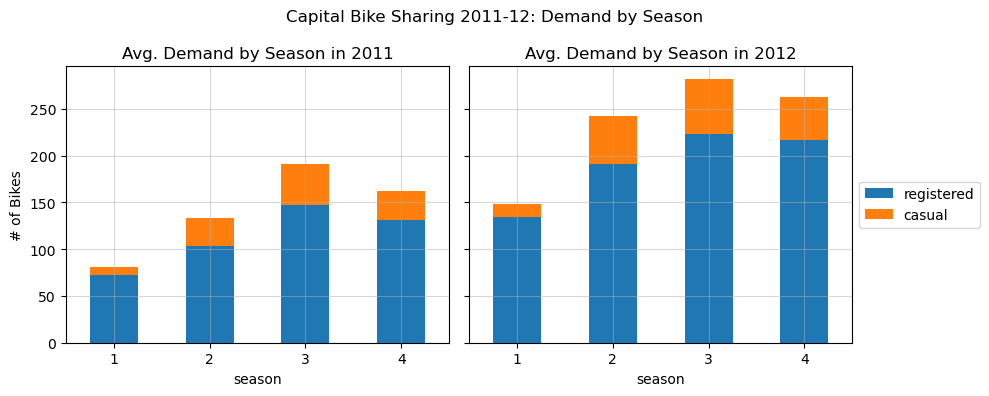

In [19]:
# average demand by season
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True, sharex=True)
fig.suptitle("Capital Bike Sharing 2011-12: Demand by Season")
df_11[['registered', 'casual', 'season']].groupby(['season']).mean().plot.bar(stacked=True, ax=axs[0], rot=0)
axs[0].set_title("Avg. Demand by Season in 2011")
axs[0].legend().remove()
axs[0].set_ylabel("# of Bikes")
df_12[['registered', 'casual', 'season']].groupby(['season']).mean().plot.bar(stacked=True, ax=axs[1], rot=0)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[1].set_title("Avg. Demand by Season in 2012")
plt.tight_layout();

In [21]:
corr_mat = round(df.corr().abs(), 2)
corr_mat
#plt.figure(figsize=(7,6))
#plt.title('Absolute Correlation Heatmap')
#sns.heatmap(corr_mat, annot=True, cmap='Reds', lw=0.2, linecolor='k');

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.00,0.00,0.58,0.00,0.00,0.00,0.01,0.04,0.49,0.49,0.11,0.10,0.21,0.18,0.21
yr,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.02,0.05,0.04,0.08,0.01,0.14,0.26,0.25
mnth,0.58,0.00,1.00,0.00,0.01,0.00,0.00,0.00,0.21,0.22,0.16,0.13,0.07,0.13,0.12
hr,0.00,0.00,0.00,1.00,0.01,0.00,0.00,0.03,0.14,0.14,0.28,0.13,0.30,0.38,0.40
holiday,0.00,0.00,0.01,0.01,1.00,0.19,0.11,0.00,0.04,0.04,0.01,0.01,0.03,0.05,0.04
weekday,0.00,0.00,0.00,0.00,0.19,1.00,0.79,0.05,0.03,0.03,0.04,0.00,0.24,0.08,0.00
workingday,0.01,0.00,0.00,0.00,0.11,0.79,1.00,0.04,0.04,0.04,0.01,0.01,0.30,0.12,0.02
weathersit,0.04,0.02,0.00,0.03,0.00,0.05,0.04,1.00,0.11,0.12,0.42,0.04,0.16,0.13,0.15
temp,0.49,0.05,0.21,0.14,0.04,0.03,0.04,0.11,1.00,0.99,0.07,0.03,0.46,0.34,0.41
atemp,0.49,0.04,0.22,0.14,0.04,0.03,0.04,0.12,0.99,1.00,0.06,0.06,0.46,0.34,0.41


# 3. Autocorrelation Analysis

In [22]:
def ts_plots(data, lags=None, title='Original'):
    layout = (2, 2)
    plt.figure(figsize=(10,4))
    raw = plt.subplot2grid(layout, loc=(0, 0), colspan=2)
    acf = plt.subplot2grid(layout, loc=(1, 0), colspan=1)
    pacf = plt.subplot2grid(layout, loc=(1, 1), colspan=1)
    
    raw.plot(data)
    raw.set_title(title)
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False)
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()

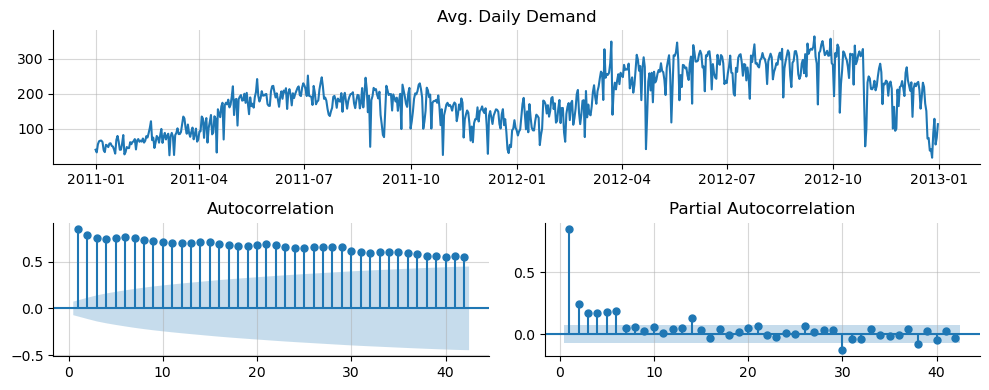

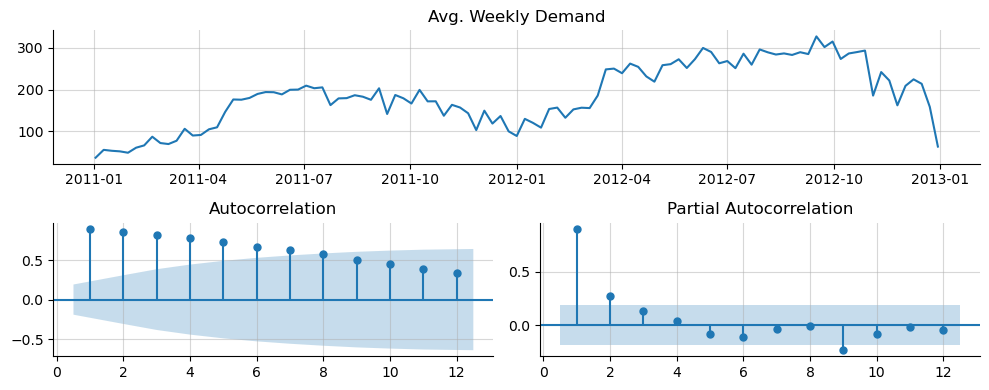

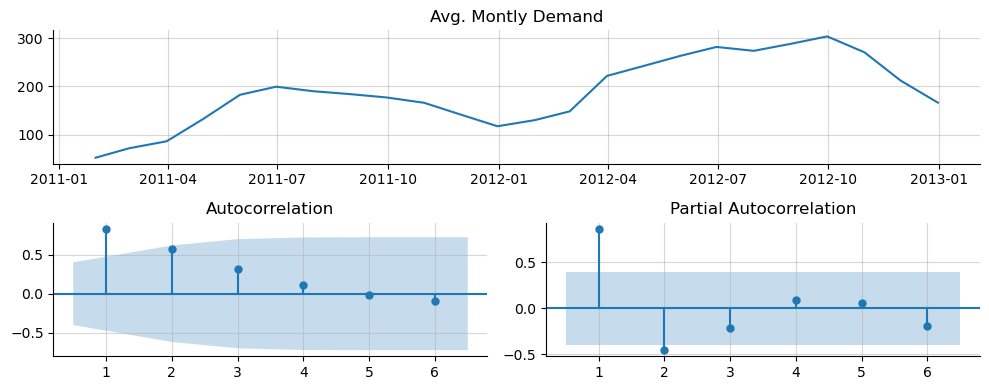

In [23]:
demand_data = [demand_daily, demand_weekly, demand_monthly]
titles = ['Avg. Daily Demand', 'Avg. Weekly Demand', 'Avg. Montly Demand']
lags = [42, 12, 6]

for demand, title, lag in zip(demand_data, titles, lags):
    ts_plots(demand['cnt'], lags=lag, title=title)

# 4. FB Prophet Time Series Analysis & Forecasting

In [24]:
# modelling average monthly data
demand_monthly1 = demand_monthly.reset_index()
demand_monthly1 = demand_monthly1.rename(columns={'index':'ds', 'cnt':'y'})

prophet_model = Prophet()
prophet_model.add_seasonality(name='monthly', period=12, fourier_order=6)
prophet_model.fit(demand_monthly1)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.


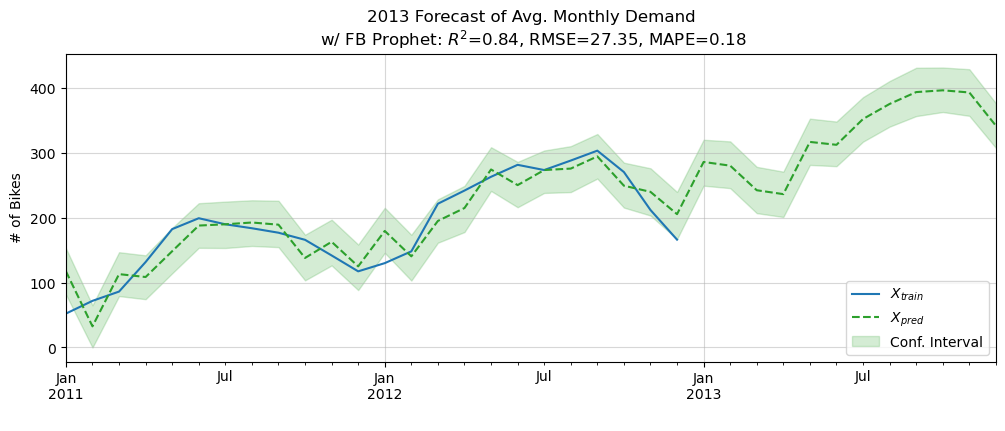

In [25]:
forecast['ds'] = forecast['ds'].astype('datetime64[M]')
forecast = forecast.set_index(forecast['ds'])

month_rmse = MSE(demand_monthly['cnt'], forecast['yhat'][:24], squared=False)
month_mape  = MAPE(demand_monthly['cnt'], forecast['yhat'][:24])
month_r2 = R2(demand_monthly['cnt'], forecast['yhat'][:24])

plt.figure(figsize=(12, 4))
plt.title("2013 Forecast of Avg. Monthly Demand\n w/ FB Prophet: $R^2$={:.2f}, RMSE={:.2f}, MAPE={:.2f}".format(month_r2, month_rmse, month_mape))
demand_monthly['cnt'].plot(label='$X_{train}$')
forecast['yhat'].plot(label='$X_{pred}$', color='tab:green', ls='--')
plt.fill_between(forecast.index, forecast.yhat_lower, forecast.yhat_upper, color='tab:green', alpha=0.2, label="Conf. Interval")
plt.xlabel(' ')
plt.ylabel('# of Bikes')
plt.legend(loc='lower right')
plt.xlim(forecast.index.min(), forecast.index.max());

In [26]:
# modelling average monthly data
demand_weekly1 = demand_weekly.reset_index()
demand_weekly1 = demand_weekly1.rename(columns={'index':'ds', 'cnt':'y'})

prophet_model = Prophet(yearly_seasonality=True)
#prophet_model.add_seasonality(name='monthly', period=4, fourier_order=6)
#prophet_model.add_seasonality(name='yearly', period=52, fourier_order=6)
prophet_model.fit(demand_weekly1)
future = prophet_model.make_future_dataframe(periods=52, freq='W')
forecast = prophet_model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


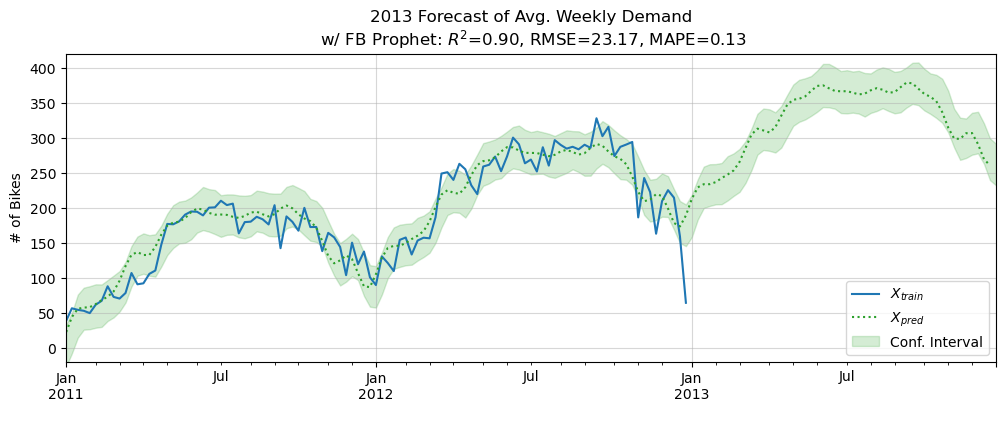

In [27]:
forecast['ds'] = forecast['ds'].astype('datetime64[W]')
forecast = forecast.set_index(forecast['ds'])

weekly_rmse = MSE(demand_weekly['cnt'], forecast['yhat'][:105], squared=False)
weekly_mape  = MAPE(demand_weekly['cnt'], forecast['yhat'][:105])
weekly_r2  = R2(demand_weekly['cnt'], forecast['yhat'][:105])

plt.figure(figsize=(12, 4))
plt.title("2013 Forecast of Avg. Weekly Demand\n w/ FB Prophet: $R^2$={:.2f}, RMSE={:.2f}, MAPE={:.2f}".format(weekly_r2, weekly_rmse, weekly_mape))
demand_weekly['cnt'].plot(label='$X_{train}$')
forecast['yhat'].plot(label='$X_{pred}$', color='tab:green', ls=':')
plt.fill_between(forecast.index, forecast.yhat_lower, forecast.yhat_upper, color='tab:green', alpha=0.2, label="Conf. Interval")
plt.xlabel(' ')
plt.ylabel('# of Bikes')
plt.ylim(-20, 420)
plt.legend(loc='lower right')
plt.xlim(forecast.index.min(), forecast.index.max());

In [28]:
# modelling average daily data
demand_daily1 = demand_daily.reset_index()
demand_daily1 = demand_daily1.rename(columns={'index':'ds', 'cnt':'y'})

prophet_model = Prophet()
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=3)
prophet_model.fit(demand_daily1)
future = prophet_model.make_future_dataframe(periods=365, freq='D')
forecast = prophet_model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


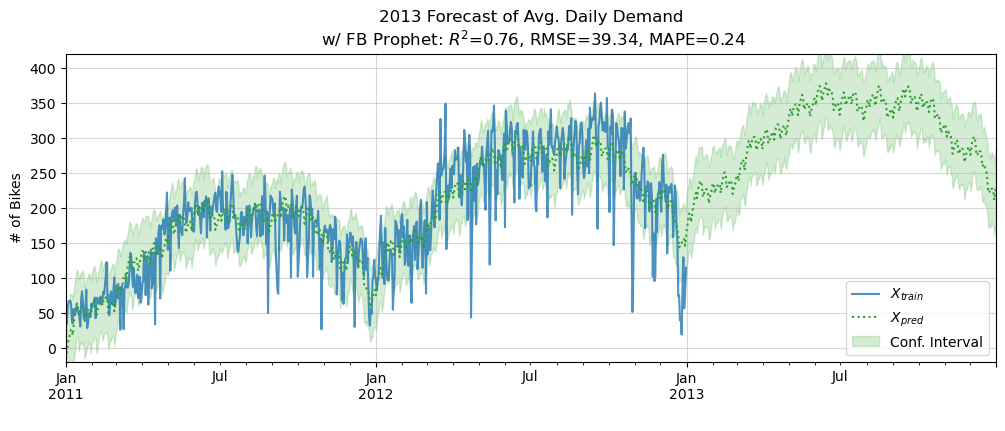

In [29]:
forecast['ds'] = forecast['ds'].astype('datetime64[D]')
forecast = forecast.set_index(forecast['ds'])

daily_rmse = MSE(demand_daily['cnt'], forecast['yhat'][:731], squared=False)
daily_mape  = MAPE(demand_daily['cnt'], forecast['yhat'][:731])
daily_r2  = R2(demand_daily['cnt'], forecast['yhat'][:731])

plt.figure(figsize=(12, 4))
plt.title("2013 Forecast of Avg. Daily Demand\n w/ FB Prophet: $R^2$={:.2f}, RMSE={:.2f}, MAPE={:.2f}".format(daily_r2, daily_rmse, daily_mape))
demand_daily['cnt'].plot(label='$X_{train}$', alpha=0.8)
forecast['yhat'].plot(label='$X_{pred}$', color='tab:green', ls=':')
plt.fill_between(forecast.index, forecast.yhat_lower, forecast.yhat_upper, color='tab:green', alpha=0.2, label="Conf. Interval")
plt.xlabel(' ')
plt.ylabel('# of Bikes')
plt.ylim(-20, 420)
plt.legend(loc='lower right')
plt.xlim(forecast.index.min(), forecast.index.max());

# 5. Keras DL Time Series Analysis & Forecasting

In [30]:
def fit_SimpleRNN(train_X, train_y, cell_units, epochs, batch_size, name='Simple-RNN-Model'):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells 
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential(name=name ) 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, return_sequences=True, input_shape=(train_X.shape[1],1)))
    model.add(SimpleRNN(cell_units, return_sequences=False))
    
    # add an output layer to make final predictions 
    model.add(Dense(12))
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, verbose=1)
    
    return model

In [31]:
# monthly demand
# create NN training data
training_data = demand_monthly.values
print(training_data.shape)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(training_data)

X_train, y_train = [], []

seq_len = 6

for i in range(seq_len, len(scaled_data)):
    X_train.append(scaled_data[i-seq_len:i, 0])
    y_train.append(scaled_data[i, 0])

    
# convert list to array

X_train = np.array(X_train)
y_train = np.array(y_train)

# reshape for RNN & LSTM 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# create test dataset of last 6 month
test_data = scaled_data[-12:, :]

X_test = []

for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i, 0])
    
X_test = np.array(X_test)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training shape ", X_train.shape)
print("Testing shape ", X_test.shape)

(24, 1)
Training shape  (18, 6, 1)
Testing shape  (6, 6, 1)


In [32]:
model = fit_SimpleRNN(X_train, y_train, X_train.shape[1], 200, batch_size=32, name="Monthly-Demand-RNN")
model.summary()

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.6678
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6089
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 0.5529
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 0.4999
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 0.4500
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 0.4033
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 0.3598
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 0.3196
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2826
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2488
Epoch 11/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2181
Epoch 12/200
1/1 [==============================] - 0s 5ms/step - loss: 0.1906
Epoch 13/200
1/1 [==============================] - 0s 5ms/ste

In [33]:
y_pred = model.predict(X_test)

y_test = demand_monthly.values[-6:]
y_pred = scaler.inverse_transform(y_pred)

m_rnn_r2 = R2(y_test, y_pred)
m_rnn_rmse = MSE(y_test, y_pred, squared=False)
m_rnn_mape = MAPE(y_test, y_pred)

scores = [m_rnn_r2, m_rnn_rmse, m_rnn_mape]
for score in scores:
    print(score)

0.43118755550962906
36.081788909142944
0.14035941960307236


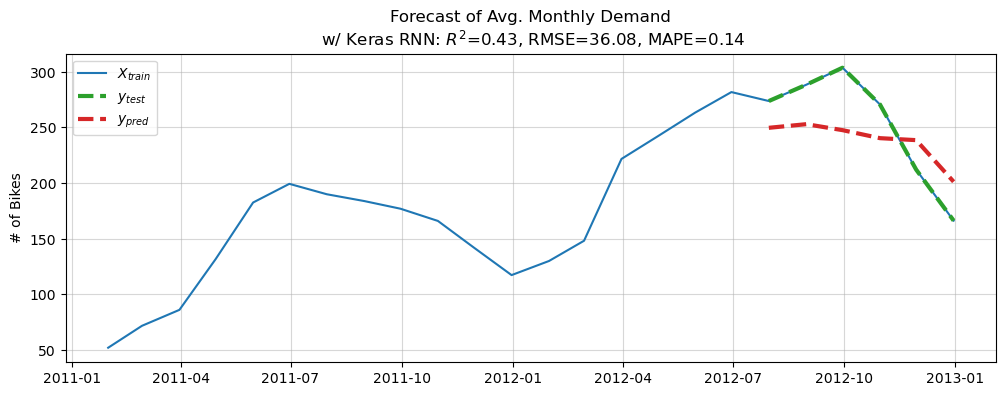

In [34]:
plt.figure(figsize=(12, 4))
plt.title("Forecast of Avg. Monthly Demand\n w/ Keras RNN: $R^2$={:.2f}, RMSE={:.2f}, MAPE={:.2f}".format(m_rnn_r2, m_rnn_rmse, m_rnn_mape))

plt.plot(demand_monthly.index, demand_monthly['cnt'], label='$X_{train}$')
plt.plot(demand_monthly.index[18:], y_test, label="$y_{test}$", color='tab:green', ls='--', lw=3)
plt.plot(demand_monthly.index[18:], y_pred, label="$y_{pred}$", color='tab:red', ls='--', lw=3)
plt.xlabel(' ')
plt.ylabel('# of Bikes')
plt.legend(loc='upper left');
#plt.xlim(demand_monthly.index.min(), demand_monthly.index.min());

In [35]:
# weekly demand
# create NN training data
training_data = demand_weekly.values
print(training_data.shape)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(training_data)

X_train, y_train = [], []

seq_len = 8 # ~2 months

for i in range(seq_len, len(scaled_data)):
    X_train.append(scaled_data[i-seq_len:i, 0])
    y_train.append(scaled_data[i, 0])

    
# convert list to array

X_train = np.array(X_train)
y_train = np.array(y_train)

# reshape for RNN & LSTM 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# create test dataset of last 6 month
test_data = scaled_data[-26:, :]

X_test = []

for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i, 0])
    
X_test = np.array(X_test)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training shape ", X_train.shape)
print("Testing shape ", X_test.shape)

(105, 1)
Training shape  (97, 8, 1)
Testing shape  (18, 8, 1)


In [36]:
model = fit_SimpleRNN(X_train, y_train, X_train.shape[1], 200, batch_size=32, name="Weekly-Demand-RNN")
model.summary()

Epoch 1/200
4/4 [==============================] - 2s 7ms/step - loss: 0.5685
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.2756
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1818
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1564
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1326
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1188
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0817
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0816
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0877
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0796
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0714
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0601
Epoch 13/200
4/4 [==============================] - 0s 4ms/st

In [37]:
y_pred = model.predict(X_test)

y_test = demand_weekly.values[-18:]
y_pred = scaler.inverse_transform(y_pred)

w_rnn_r2 = R2(y_test, y_pred)
w_rnn_rmse = MSE(y_test, y_pred, squared=False)
w_rnn_mape = MAPE(y_test, y_pred)

scores = [w_rnn_r2, w_rnn_rmse, w_rnn_mape]
for score in scores:
    print(score)

0.5116741880407387
46.295729649422476
0.21497582142960756


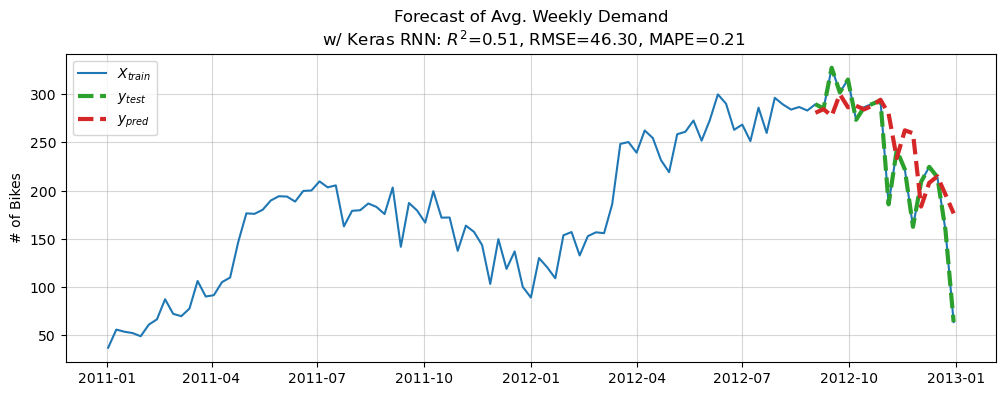

In [38]:
plt.figure(figsize=(12, 4))
plt.title("Forecast of Avg. Weekly Demand\n w/ Keras RNN: $R^2$={:.2f}, RMSE={:.2f}, MAPE={:.2f}".format(w_rnn_r2, w_rnn_rmse, w_rnn_mape))

plt.plot(demand_weekly.index, demand_weekly['cnt'], label='$X_{train}$')
plt.plot(demand_weekly.index[-18:], y_test, label="$y_{test}$", color='tab:green', ls='--', lw=3)
plt.plot(demand_weekly.index[-18:], y_pred, label="$y_{pred}$", color='tab:red', ls='--', lw=3)
plt.xlabel(' ')
plt.ylabel('# of Bikes')
plt.legend(loc='upper left');
#plt.xlim(demand_weekly.index.min(), demand_weekly.index.max());

In [39]:
# daily demand
# create NN training data
training_data = demand_daily.values
print(training_data.shape)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(training_data)

X_train, y_train = [], []

seq_len = 30 # ~1 months

for i in range(seq_len, len(scaled_data)):
    X_train.append(scaled_data[i-seq_len:i, 0])
    y_train.append(scaled_data[i, 0])

    
# convert list to array

X_train = np.array(X_train)
y_train = np.array(y_train)

# reshape for RNN & LSTM 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# create test dataset of last 6 month
test_data = scaled_data[-182:, :]

X_test = []

for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i, 0])
    
X_test = np.array(X_test)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Training shape ", X_train.shape)
print("Testing shape ", X_test.shape)

(731, 1)
Training shape  (701, 30, 1)
Testing shape  (152, 30, 1)


In [40]:
model = fit_SimpleRNN(X_train, y_train, 50, 50, batch_size=128, name="Daily-Demand-RNN")
model.summary()

Epoch 1/50
6/6 [==============================] - 2s 13ms/step - loss: 1.6168
Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: 0.1121
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0588
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0523
Epoch 5/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0465
Epoch 6/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0324
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0294
Epoch 8/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0269
Epoch 9/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0210
Epoch 10/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0206
Epoch 11/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0208
Epoch 12/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0196
Epoch 13/50
6/6 [==============================] - 0s 14ms/st

In [41]:
y_pred = model.predict(X_test)

y_test = demand_daily.values[-152:, 0]
y_pred = scaler.inverse_transform(y_pred)

d_rnn_r2 = R2(y_test, y_pred)
d_rnn_rmse = MSE(y_test, y_pred, squared=False)
d_rnn_mape = MAPE(y_test, y_pred)

scores = [d_rnn_r2, d_rnn_rmse, d_rnn_mape]
for score in scores:
    print(score)

0.6262270659091316
46.14340373336475
0.24071955663198305


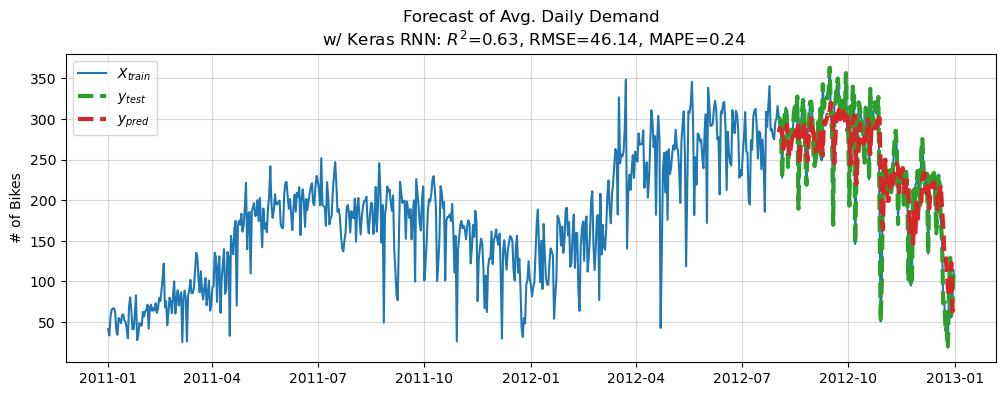

In [42]:
plt.figure(figsize=(12, 4))
plt.title("Forecast of Avg. Daily Demand\n w/ Keras RNN: $R^2$={:.2f}, RMSE={:.2f}, MAPE={:.2f}".format(d_rnn_r2, d_rnn_rmse, d_rnn_mape))

plt.plot(demand_daily.index, demand_daily['cnt'], label='$X_{train}$')
plt.plot(demand_daily.index[-152:], y_test, label="$y_{test}$", color='tab:green', ls='--', lw=3)
plt.plot(demand_daily.index[-152:], y_pred, label="$y_{pred}$", color='tab:red', ls='--', lw=3)
plt.xlabel(' ')
plt.ylabel('# of Bikes')
plt.legend(loc='upper left');
#plt.xlim(demand_weekly.index.min(), demand_weekly.index.max());

# 6. Model Evaluation

In [54]:
FB_monthly = [month_r2, month_rmse, month_mape]
FB_weekly = [weekly_r2, weekly_rmse, weekly_mape]
FB_daily = [daily_r2, daily_rmse, daily_mape]

RNN_monthly = [m_rnn_r2, m_rnn_rmse, m_rnn_mape]
RNN_weekly = [w_rnn_r2, w_rnn_rmse, w_rnn_mape]
RNN_daily = [d_rnn_r2, d_rnn_rmse, d_rnn_mape]

In [65]:
model_eval= pd.DataFrame(FB_monthly, index=["R^2", "RMSE", "MAPE"])
model_eval.columns = ['Prophet Monthly']
model_eval.insert(loc=1, column='Prophet Weekly', value=FB_weekly)
model_eval.insert(loc=2, column='Prophet Daily', value=FB_daily)
model_eval.insert(loc=3, column='RNN Monthly', value=RNN_monthly)
model_eval.insert(loc=4, column='RNN Weekly', value=RNN_weekly)
model_eval.insert(loc=5, column='RNN Daily', value=RNN_daily)
round(model_eval, 4)

,Prophet Monthly,Prophet Weekly,Prophet Daily,RNN Monthly,RNN Weekly,RNN Daily
R^2,0.8445,0.9012,0.7602,0.4312,0.5117,0.6262
RMSE,27.3485,23.1713,39.3394,36.0818,46.2957,46.1434
MAPE,0.1820,0.1274,0.2415,0.1404,0.2150,0.2407
